In [1]:
import sys
sys.path.append("../")  

import numpy as np 
import torch, time
import sys
import utility, problem
import random
import net, gc
import matplotlib.pyplot as plt

def set_seed(seed=42):
    random.seed(seed)             # Python 内置随机数种子
    np.random.seed(seed)          # NumPy 随机数种子
    torch.manual_seed(seed)       # PyTorch CPU 随机数种子
    torch.cuda.manual_seed(seed)  # PyTorch GPU 随机数种子
    torch.cuda.manual_seed_all(seed)  # 多 GPU 训练时设定所有 GPU 相同种子
    torch.backends.cudnn.deterministic = True  # 保证 CUDA 计算的确定性
    torch.backends.cudnn.benchmark = False  # 关闭自动优化（可能影响速度）

# 设置随机种子


torch.set_default_dtype(torch.float64)
plt.rcParams.update({'font.size': 20})
def exact_solution_Kovasznay(x):  # 你可以设置 Re=40，对应 ν = 1/40
    nu = 1/40
    λ = 0.5 / nu - np.sqrt(0.25 / nu ** 2 + 4 * np.pi ** 2)
    x1, x2 = x[:, 0:1], x[:, 1:2]
    u = 1 - torch.exp(λ * x1) * torch.cos(2 * np.pi * x2)
    v = (λ / (2 * np.pi)) * torch.exp(λ * x1) * torch.sin(2 * np.pi * x2)
    p = 0.5 * (1 - torch.exp(2 * λ * x1))
    return torch.cat([u, v, p], dim=1)
gc.collect()

0

### PD-OFM

Loss at Step 50 is 1.8642769395343408 with pde loss 1.1832430322297387 , orthogonal loss 68.10339073046022 and rank of matrix 30.
Loss at Step 100 is 1.3866576008203024 with pde loss 1.0376562773268638 , orthogonal loss 34.900132349343856 and rank of matrix 35.
Loss at Step 150 is 1.155770979151047 with pde loss 0.8015919722113604 , orthogonal loss 35.417900693968676 and rank of matrix 38.
Loss at Step 200 is 1.0033401902658319 with pde loss 0.6585245892229005 , orthogonal loss 34.48156010429314 and rank of matrix 43.
Loss at Step 250 is 0.8955647961593494 with pde loss 0.5656420297156562 , orthogonal loss 32.99227664436932 and rank of matrix 44.
Loss at Step 300 is 0.8091034294367496 with pde loss 0.4870322273589679 , orthogonal loss 32.20712020777817 and rank of matrix 48.
Loss at Step 350 is 0.7353394520806444 with pde loss 0.4285545831235144 , orthogonal loss 30.678486895713004 and rank of matrix 50.
Loss at Step 400 is 0.6798994705596824 with pde loss 0.37649730138334153 , orthogo

c:\Users\29433\Desktop\Studying_Materials\2025spring\OrthoPINN\github_code\numerical_experiment\..\utility.py:238: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  perdict = lambda x: torch.stack([torch.matmul(model(x)[0], torch.tensor(a).to(device)), torch.matmul(model(x)[0], torch.tensor(b).to(device)), torch.matmul(model(x)[0], torch.tensor(c).to(device))], dim=1)


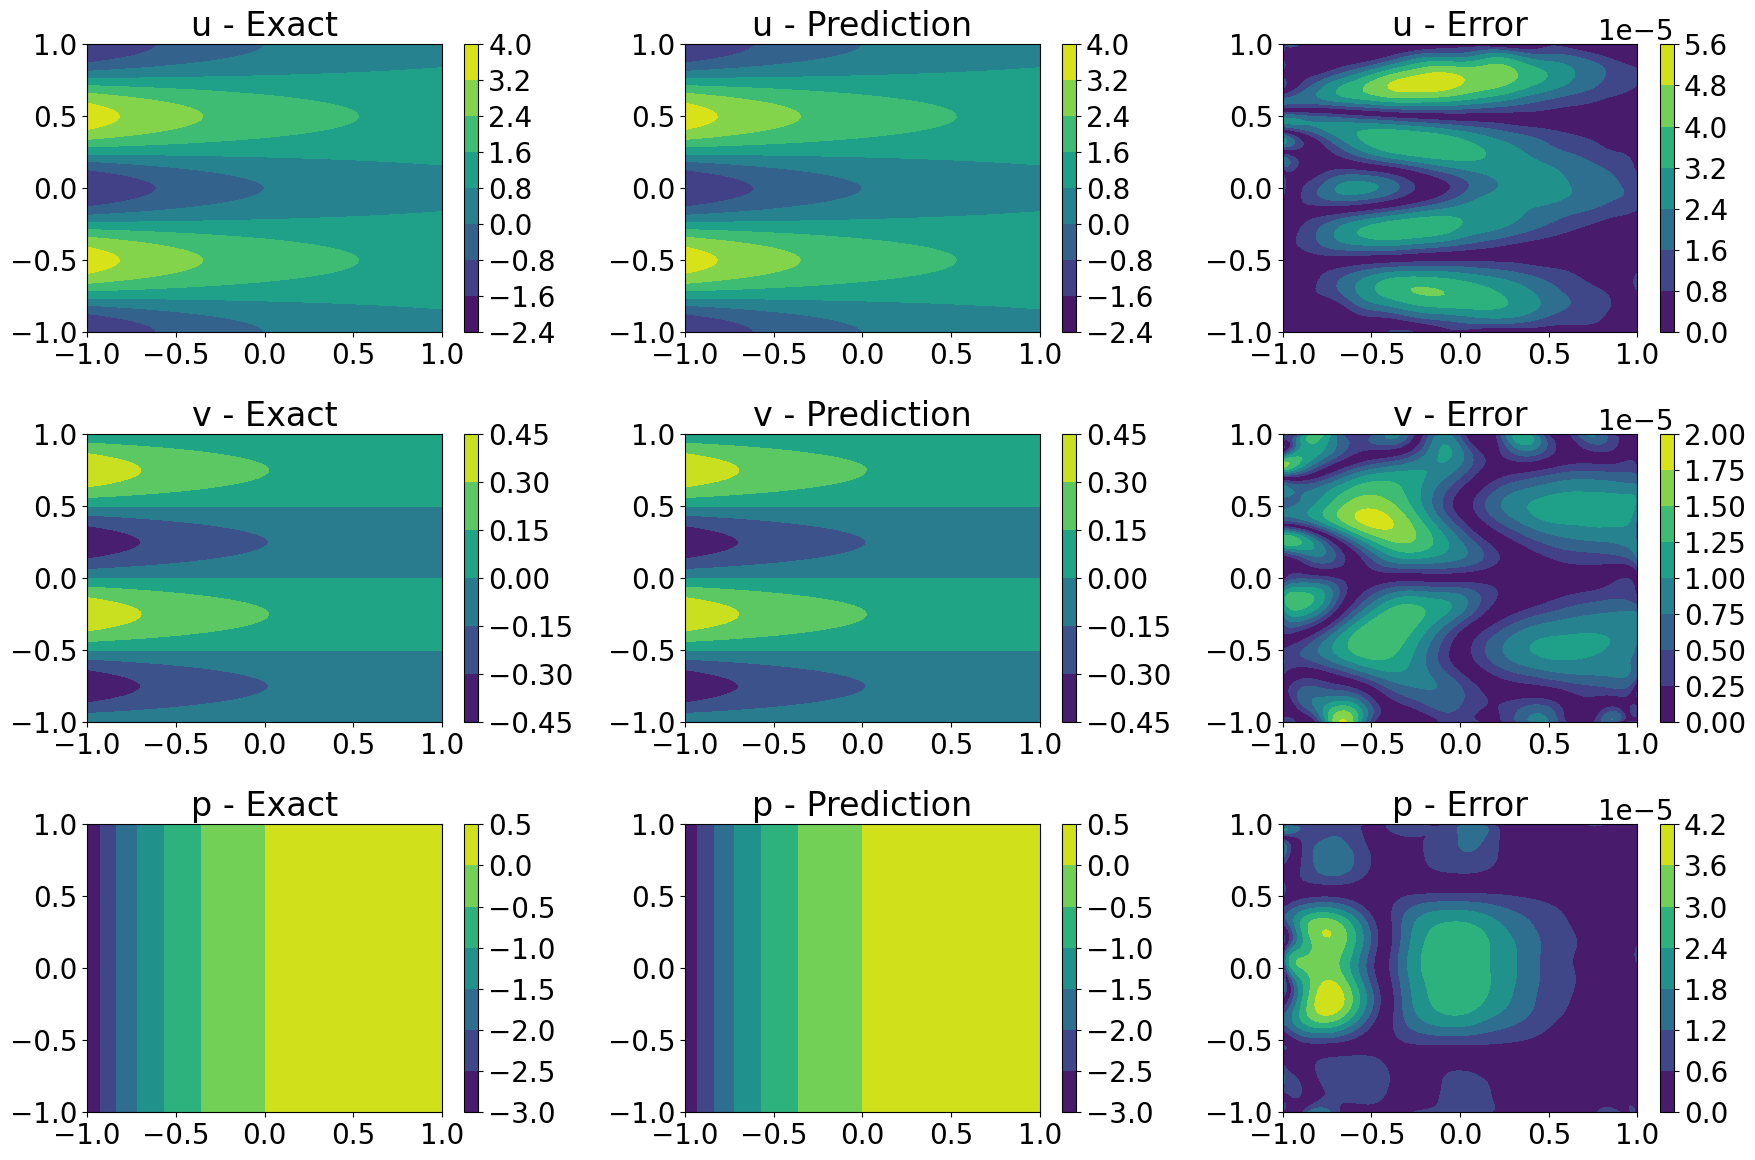

([array(30),
  array(35),
  array(38),
  array(43),
  array(44),
  array(48),
  array(50),
  array(52),
  array(53),
  array(55)],
 [],
 array([ 7.96646625e-06,  1.30522203e-06, -6.66189150e-06, ...,
        -3.47631788e-06, -4.88861139e-06,  4.87647370e-06]))

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Pro = problem.NavierStokes(0, exact_solution_Kovasznay, exact_solution_Kovasznay, x_range=[-1, 1], y_range=[-1, 1], device=device)
params = {"d": 2, "bodyBatch": 1000, "bdryBatch": 200, "lr": 0.001, "width": 300, "depth": 2, "output": 3, "trainStep": 500, "writeStep": 50, "plotStep": 600, "decay": 0.0001, "epsilon": 1e-3, "orthogonalpenalty": 0.01}
startTime = time.time()
model = net.PD_OFM(params).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=params["lr"],weight_decay=params["decay"])

startTime = time.time()
utility.trainnew(model,Pro,device,params,optimizer)  #trainnew model

### PD-FM

Loss at Step 50 is 0.6457517979588488 with pde loss 0.6457517979588488 , orthogonal loss 2529.3194089293365 and rank of matrix 30.
Loss at Step 100 is 0.4151769779013924 with pde loss 0.4151769779013924 , orthogonal loss 3241.919867230794 and rank of matrix 34.
Loss at Step 150 is 0.3886527514043503 with pde loss 0.3886527514043503 , orthogonal loss 4193.874863195515 and rank of matrix 40.
Loss at Step 200 is 0.3330750394358314 with pde loss 0.3330750394358314 , orthogonal loss 5389.562665793028 and rank of matrix 43.
Loss at Step 250 is 0.30217867170670726 with pde loss 0.30217867170670726 , orthogonal loss 6787.965523170403 and rank of matrix 47.
Loss at Step 300 is 0.2688709023031318 with pde loss 0.2688709023031318 , orthogonal loss 8136.216603784887 and rank of matrix 52.
Loss at Step 350 is 0.2500449328132186 with pde loss 0.2500449328132186 , orthogonal loss 9294.97649204875 and rank of matrix 55.
Loss at Step 400 is 0.22339975146083096 with pde loss 0.22339975146083096 , orthog

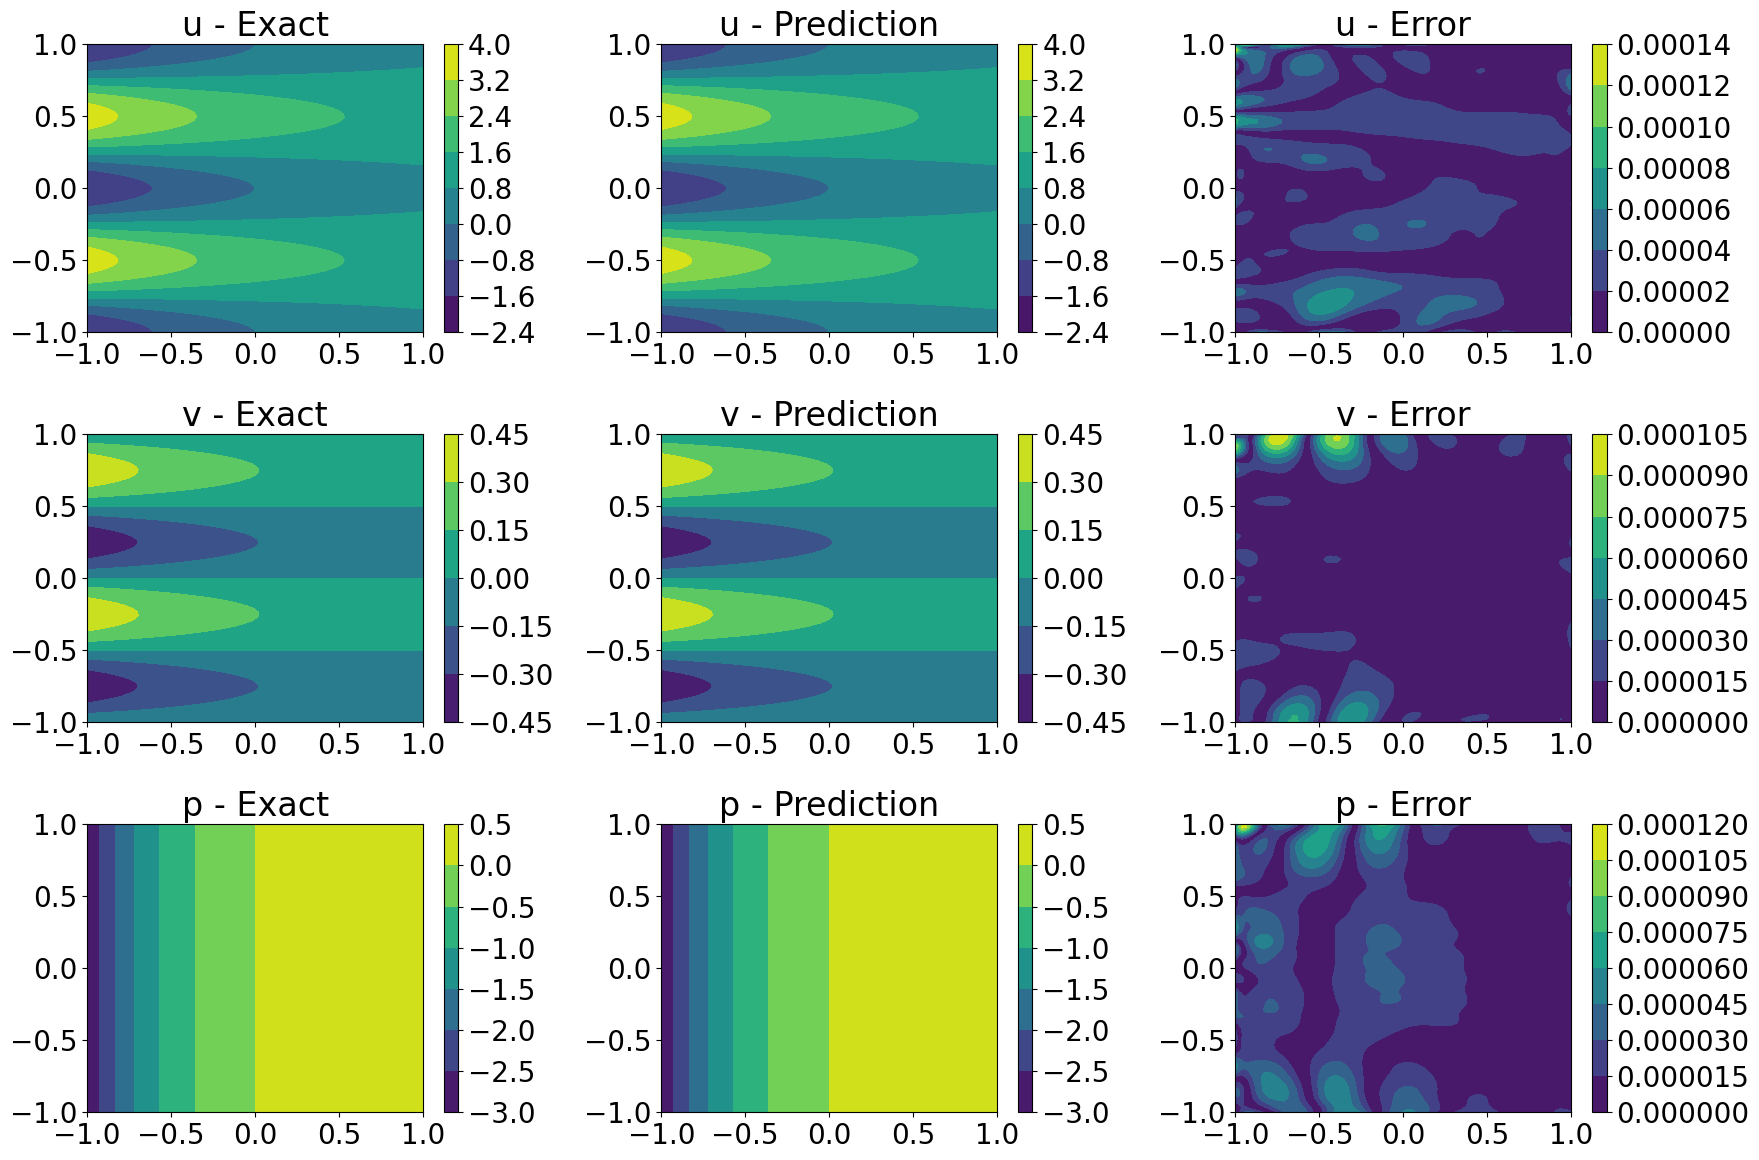

([array(30),
  array(34),
  array(40),
  array(43),
  array(47),
  array(52),
  array(55),
  array(57),
  array(58),
  array(60)],
 [],
 array([ 7.49034608e-06,  2.49297706e-05, -3.81569073e-05, ...,
         2.09016906e-05,  6.68979547e-06, -2.16935154e-05]))

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Pro = problem.NavierStokes(0, exact_solution_Kovasznay, exact_solution_Kovasznay, x_range=[-1, 1], y_range=[-1, 1], device=device)
params = {"d": 2, "bodyBatch": 1000, "bdryBatch": 200, "lr": 0.001, "width": 300, "depth": 2, "output": 3, "trainStep": 500, "writeStep": 50, "plotStep": 600, "decay": 0.0001, "epsilon": 1e-3, "orthogonalpenalty": 0}
startTime = time.time()
model = net.PD_OFM(params).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=params["lr"],weight_decay=params["decay"])

startTime = time.time()
utility.trainnew(model,Pro,device,params,optimizer)  #trainnew model

### Transnet

c:\Users\29433\Desktop\Studying_Materials\2025spring\OrthoPINN\github_code\numerical_experiment\..\net.py:279: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3701.)
  alpha = torch.linalg.lstsq(basis_eval, grf_sample.T).solution  # (basis_num, 1)


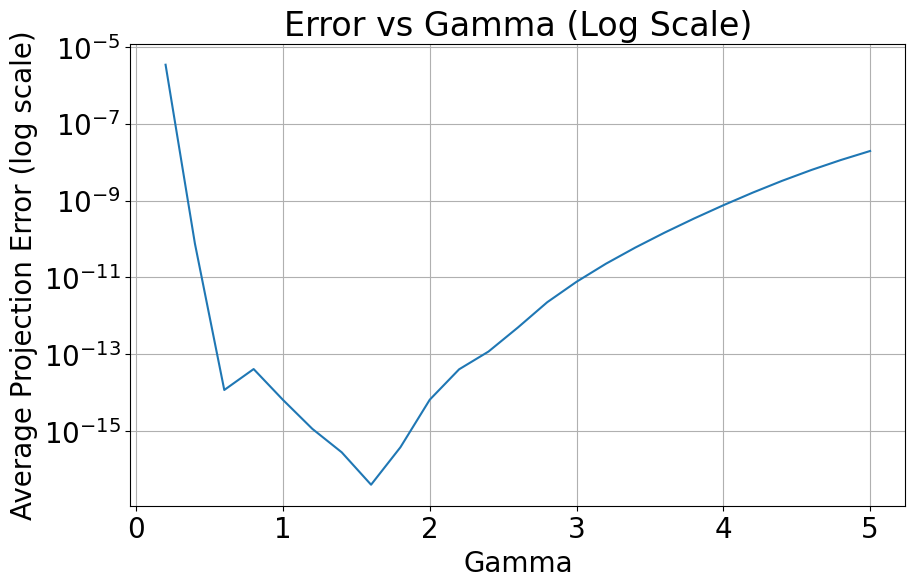

[Picard 0] LS MSE: 8.86e-02
[Picard 1] LS MSE: 1.25e-02
[Picard 2] LS MSE: 2.16e-03
[Picard 3] LS MSE: 9.76e-04
[Picard 4] LS MSE: 2.65e-04
[Picard 5] LS MSE: 5.61e-05
[Picard 6] LS MSE: 1.54e-05
[Picard 7] LS MSE: 6.28e-06
[Picard 8] LS MSE: 2.83e-06
[Picard 9] LS MSE: 1.13e-06
[Picard 10] LS MSE: 4.42e-07
[Picard 11] LS MSE: 1.35e-07
[Picard 12] LS MSE: 4.24e-08
[Picard 13] LS MSE: 1.22e-08
[Picard 14] LS MSE: 4.76e-09
[Picard 15] LS MSE: 2.10e-09
[Picard 16] LS MSE: 9.13e-10
[Picard 17] LS MSE: 3.67e-10
[Picard 18] LS MSE: 1.21e-10
[Picard 19] LS MSE: 3.96e-11


C:\Users\29433\AppData\Local\Temp\ipykernel_42552\2455590673.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  perdict = lambda x: torch.stack([torch.matmul(model(x)[0], torch.tensor(a).to(device)), torch.matmul(model(x)[0], torch.tensor(b).to(device)), torch.matmul(model(x)[0], torch.tensor(c).to(device))], dim=1)


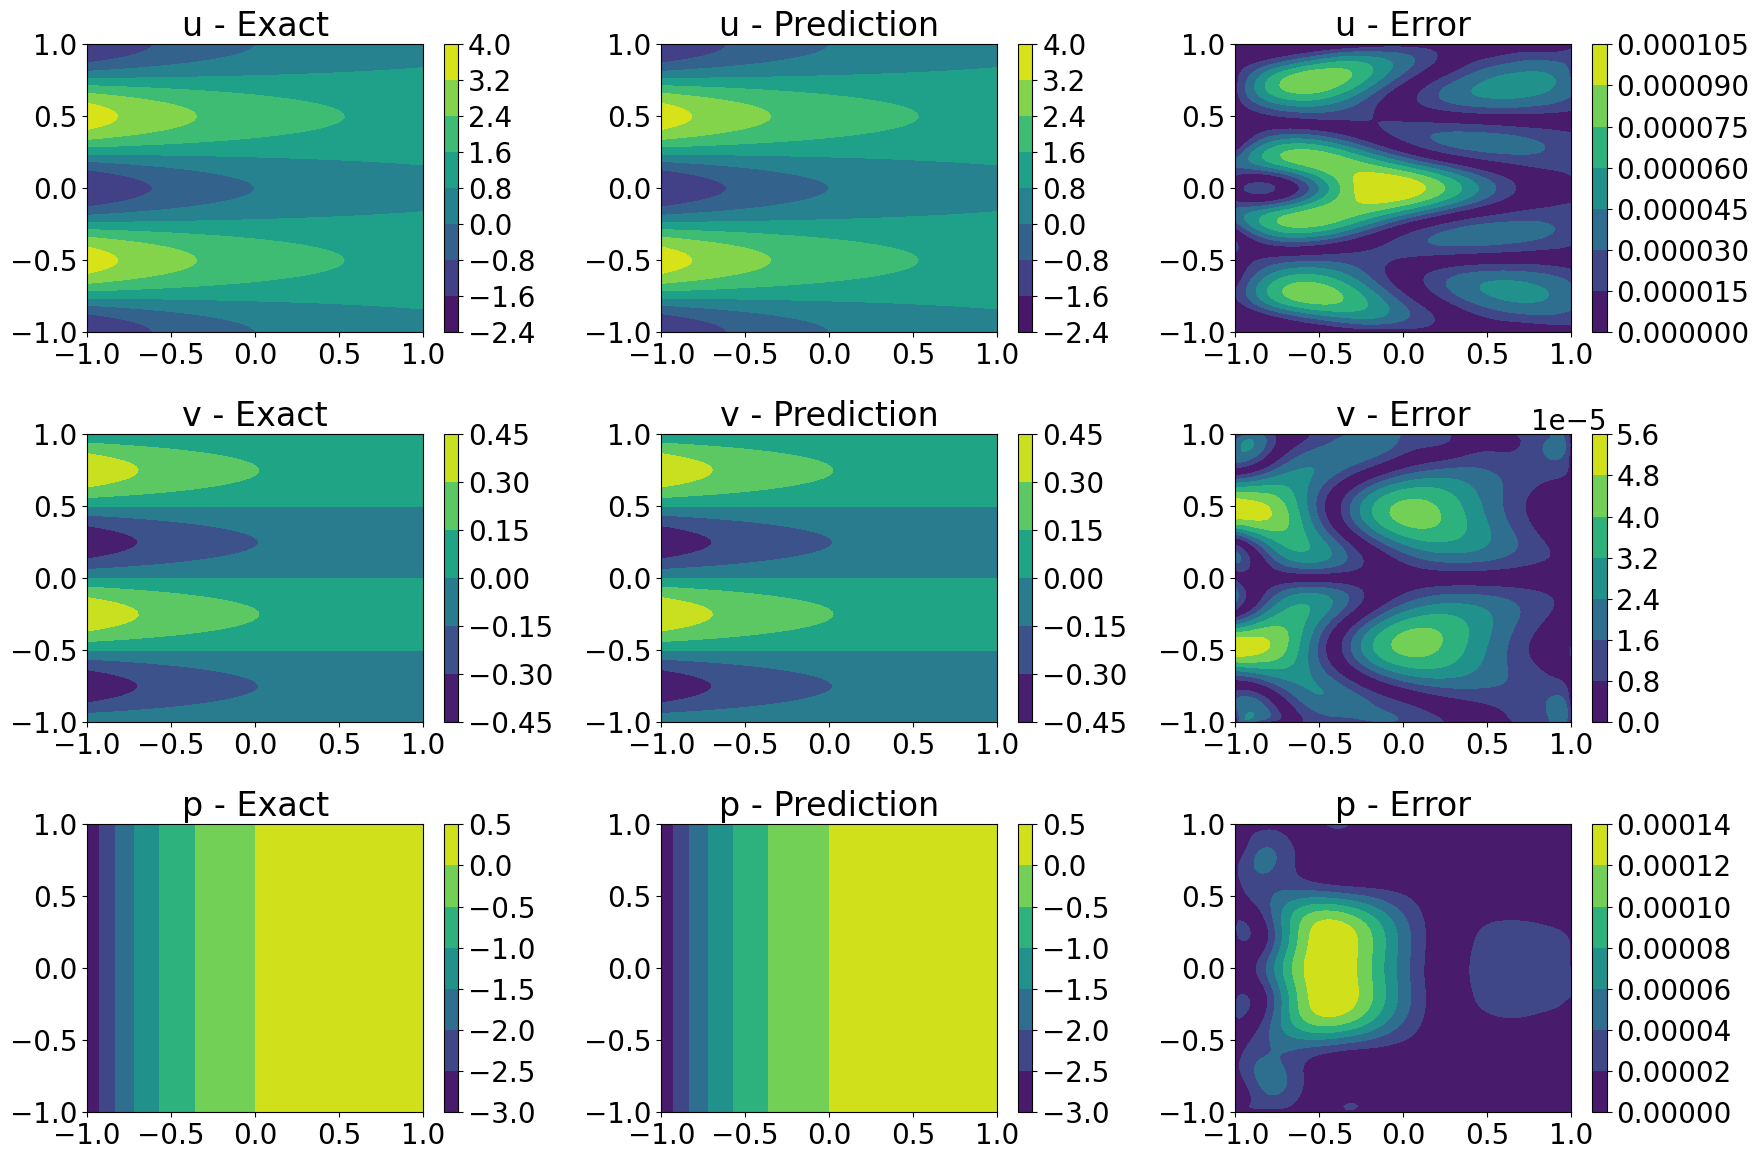

In [4]:
gc.collect()
torch.cuda.empty_cache()  
set_seed(42)

device = "cpu"
Pro = problem.NavierStokes(None, exact_solution_Kovasznay, exact_solution_Kovasznay, x_range=[-1, 1], y_range=[-1, 1], device=device)
params = dict()
params = {"radius": 1.5, "d": 2, "bodyBatch": 1000, "bdryBatch": 200, "width": 300}
Pro.generate_points(params["bodyBatch"], params["bdryBatch"], "random")
int_data = Pro.data()["interior_points"].to(device)
bdry_data = Pro.data()["boundary_points"].to(device)
int_data.requires_grad = True
bdry_data.requires_grad = True
model = net.TransNet(x_dim=params["d"], basis_num=params["width"], radius=params["radius"]).to(device)
basis = lambda x: model(x)
a,b,c,residual = Pro.picardleastsquareproblem(model, int_data, bdry_data)
perdict = lambda x: torch.stack([torch.matmul(model(x)[0], torch.tensor(a).to(device)), torch.matmul(model(x)[0], torch.tensor(b).to(device)), torch.matmul(model(x)[0], torch.tensor(c).to(device))], dim=1)
Pro.plot(perdict)

### Random Feature Method

[Picard 0] LS MSE: 8.89e-02
[Picard 1] LS MSE: 1.00e-02
[Picard 2] LS MSE: 1.30e-03
[Picard 3] LS MSE: 3.15e-04
[Picard 4] LS MSE: 7.66e-05
[Picard 5] LS MSE: 1.96e-05
[Picard 6] LS MSE: 1.07e-05
[Picard 7] LS MSE: 5.06e-06
[Picard 8] LS MSE: 2.61e-06
[Picard 9] LS MSE: 1.18e-06
[Picard 10] LS MSE: 7.51e-07
[Picard 11] LS MSE: 5.52e-07
[Picard 12] LS MSE: 5.17e-07
[Picard 13] LS MSE: 4.76e-07
[Picard 14] LS MSE: 4.61e-07
[Picard 15] LS MSE: 4.41e-07
[Picard 16] LS MSE: 4.31e-07
[Picard 17] LS MSE: 4.21e-07
[Picard 18] LS MSE: 4.16e-07
[Picard 19] LS MSE: 4.13e-07


C:\Users\29433\AppData\Local\Temp\ipykernel_42552\1880741596.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  perdict = lambda x: torch.stack([torch.matmul(model(x)[0], torch.tensor(a).to(device)), torch.matmul(model(x)[0], torch.tensor(b).to(device)), torch.matmul(model(x)[0], torch.tensor(c).to(device))], dim=1)


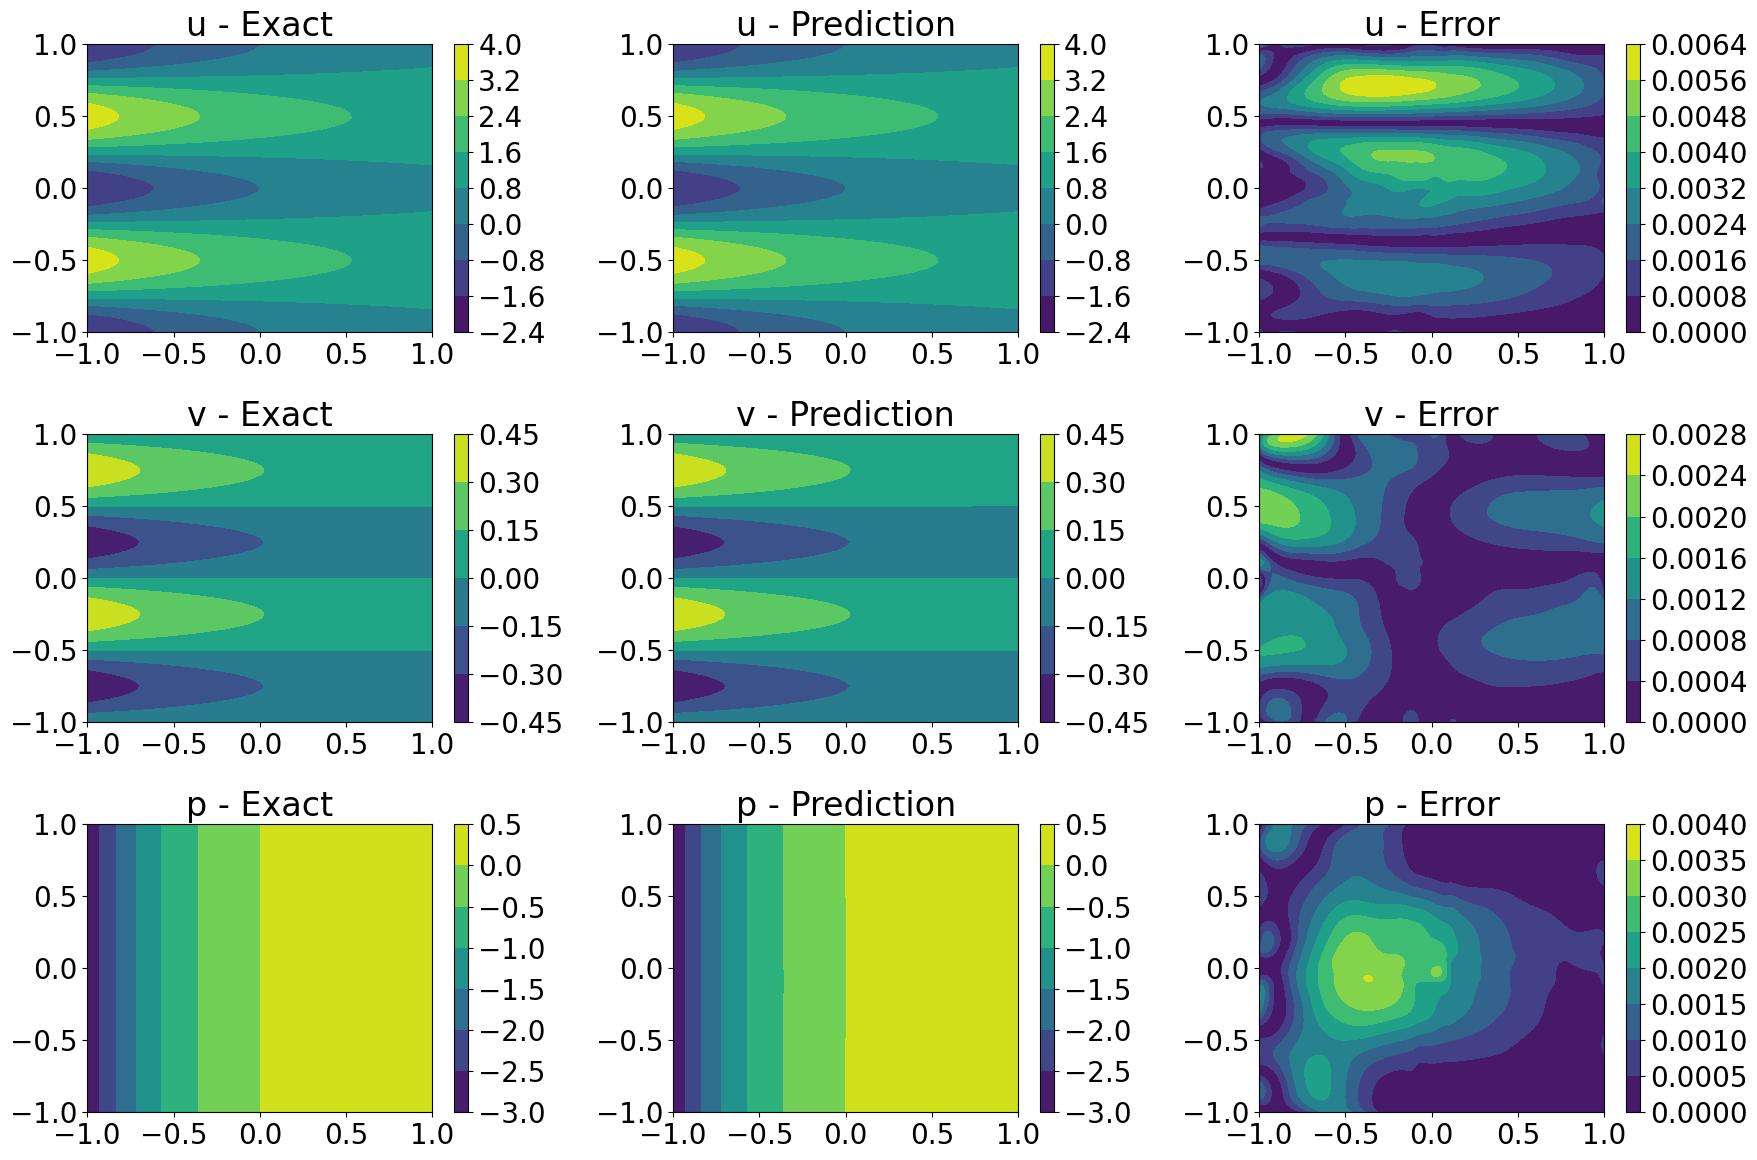

In [5]:
gc.collect()
torch.cuda.empty_cache()  
set_seed(42)

device = "cpu"
Pro = problem.NavierStokes(None, exact_solution_Kovasznay, exact_solution_Kovasznay, x_range=[-1, 1], y_range=[-1, 1], device=device)
params = dict()
params = {"d": 2, "bodyBatch": 1000, "bdryBatch": 200, "number_basis": 300}
Pro.generate_points(params["bodyBatch"], params["bdryBatch"], "random")
int_data = Pro.data()["interior_points"].to(device)
bdry_data = Pro.data()["boundary_points"].to(device)
int_data.requires_grad = True
bdry_data.requires_grad = True
centers = torch.tensor([[0.5,0.5],[-0.5,0.5],[0.5,-0.5],[-0.5,-0.5]], dtype=torch.float64).to(device)
radius = torch.tensor([[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5]], dtype=torch.float64).to(device)
model = net.RFM(params, centers, radius, typeofPoU="b", device=device).to(device)
a,b,c,residual = Pro.picardleastsquareproblem(model, int_data, bdry_data)
perdict = lambda x: torch.stack([torch.matmul(model(x)[0], torch.tensor(a).to(device)), torch.matmul(model(x)[0], torch.tensor(b).to(device)), torch.matmul(model(x)[0], torch.tensor(c).to(device))], dim=1)
Pro.plot(perdict)